# Reinforcement Learning

# 2. Dynamic programming

This notebook presents policy iteration and value iteration for finding the optimal policy.

Note that these techniques require the enumeration of all states and thus apply to a few models only (e.g., walk, maze, Tic-Tac-Toe, Nim).

In [185]:
import numpy as np

In [186]:
from model import Walk, Maze, TicTacToe, Nim
from agent import Agent

## Walk

In [190]:
walk = Walk()

In [191]:
states = walk.get_all_states()

In [192]:
len(states)

25

## Maze

In [193]:
maze_map = np.load('maze.npy')

In [194]:
maze = Maze()
init_state = (1, 0)
exit_state = (1, 20)
maze.set_parameters(maze_map, init_state, [exit_state])
maze = Maze()

In [195]:
states = maze.get_all_states()

In [196]:
len(states)

105

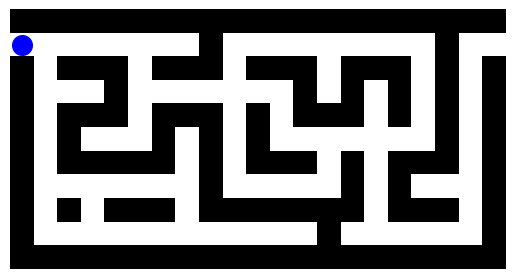

In [197]:
maze.display()

## Policy Iteration

In policy iteration, you start from an arbitrary policy and improve it sequentially from its value function. The limiting policy is optimal.

In [198]:
from dynamic import PolicyEvaluation, PolicyIteration

In [199]:
# let's start with the random policy
agent = Agent(maze)
policy = agent.policy

In [200]:
# policy evaluation
algo = PolicyEvaluation(maze, policy)
algo.evaluate_policy()
values = algo.values

In [201]:
len(values)

105

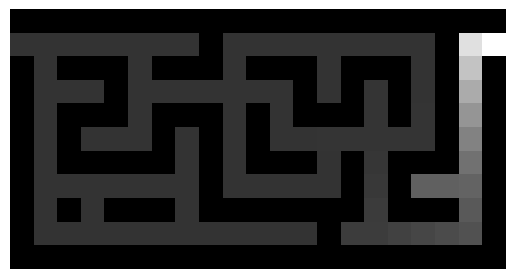

In [202]:
maze.display_values(values)

In [203]:
# policy improvement
new_policy = algo.get_policy()

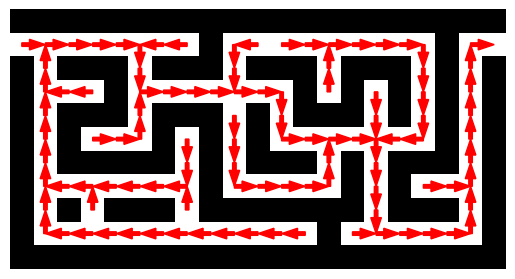

In [204]:
maze.display_policy(new_policy)

In [205]:
# let's test this new policy
agent = Agent(maze, new_policy)
stop, states, rewards = agent.get_episode()

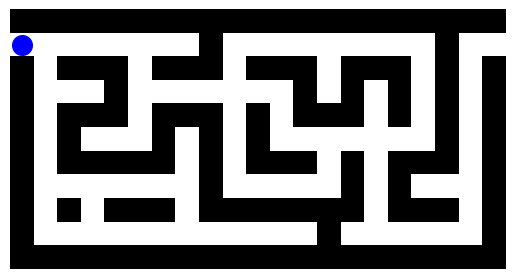

In [206]:
animation = maze.display(states)

In [207]:
animation

In general, several iterations of policy evaluation / policy improvement are necessary. 

In [208]:
algo = PolicyIteration(maze)

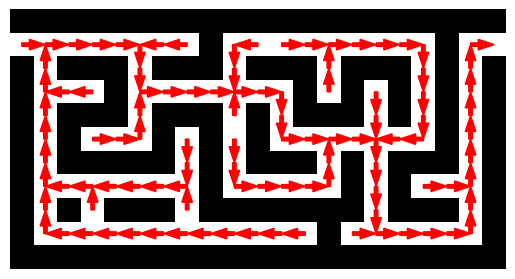

In [209]:
policy = algo.get_optimal_policy()
maze.display_policy(policy)

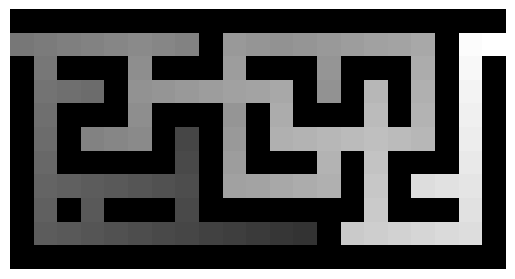

In [210]:
values = algo.values
maze.display_values(values)

## To do

Consider the Walk environment with a discount factor $\gamma = 0.9$.
* What is the expected gain of a random walk?
* Compare with the expected gain of the optimal policy, obtained by Policy Iteration.
* Display the optimal value function and the optimal policy. Interpret the results.
* Increase the strength of the wind and observe the new results.

In [211]:
walk = Walk()

In [212]:
# random policy
agent = Agent(walk)
policy = agent.policy

In [213]:
gamma = 0.9

In [214]:
gains = agent.get_gains(gamma=gamma)

Expected gain is:

In [215]:
np.mean(gains)

np.float64(0.7018156176952101)

In [ ]:
# previous wind 
wind = walk.Wind

In [217]:
# new wind
wind_ = {(0, 1): 0.8, (1, 0): 0.1}

In [218]:
Walk.set_parameters(Walk.Size, Walk.Rewards, wind_)

In [219]:
walk = Walk()

In [220]:
algo = PolicyIteration(walk)

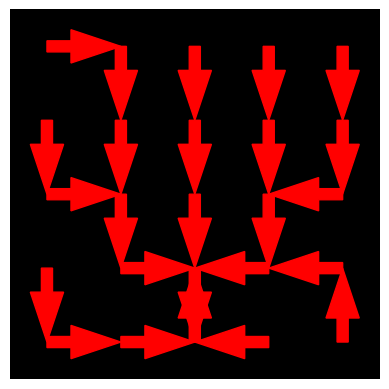

In [221]:
policy = algo.get_optimal_policy()
walk.display_policy(policy)

This represents the direction an agent should take from each state to maximize the cumulative reward.
Each arrow indicates the best action from the corresponding state based on the optimal policy.
Arrows converge toward states that have higher rewards

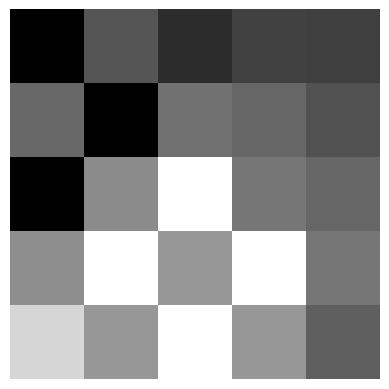

In [222]:
values = algo.values
walk.display_values(values)

This shows the value of each state under the optimal policy. Darker shades  represent lower values, while lighter shades indicate higher values.
The brightest square  represents the highest value, a terminal state with a significant reward.

In [226]:
agent = Agent(walk, policy)
gains = agent.get_gains(gamma=gamma)


The expected gain of the optimal policy

In [227]:
np.mean(gains)

np.float64(8.0006630527725)

In [234]:
# new wind
wind_ = {(0, 1): 0.85, (1, 0): 0.15}

In [230]:
wind = walk.Wind

In [235]:
Walk.set_parameters(Walk.Size, Walk.Rewards, wind_)

In [236]:
walk = Walk()

In [241]:
algo = PolicyIteration(walk)

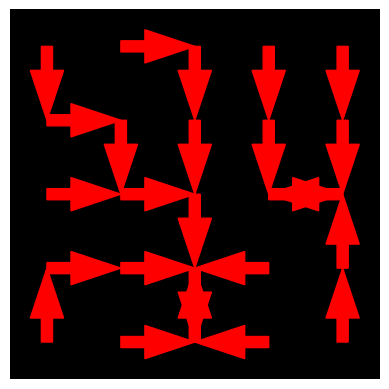

In [242]:
policy = algo.get_optimal_policy()
walk.display_policy(policy)

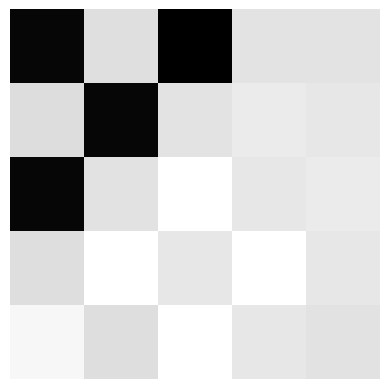

In [243]:
values = algo.values
walk.display_values(values)


The new results are more coarse, with vertical directions being more dominant. This is due to higher wind probabilities, which prioritize vertical movement and lead to less balanced transitions.

## Value Iteration

Value iteration relies on Bellman's optimality equation. 

## To do

Check the code of ``ValueIteration`` below.
* Complete the method ``get_optimal_policy``.
* Test it on the maze and the walk.
* You play TicTacToe at random against an adversary using the one-step policy. What is your expected gain? 
* Observe the improvement when you play perfectly against the same adversary.
* Do the same with Nim.

In [ ]:
class ValueIteration(PolicyEvaluation):
    """Value iteration. 
    
    Parameters
    ----------
    model: object of class Environment
        The model.
    player: int
        Player for games (1 or -1, default = default player of the game).        
    gamma: float
        Discount factor (between 0 and 1).
    n_iter: int
        Maximum number of value iterations.
    """
    
    def __init__(self, model, player=None, gamma=1, n_iter=100):
        agent = Agent(model, player=player)
        policy = agent.policy
        player = agent.player
        super(ValueIteration, self).__init__(model, policy, player, gamma)  
        self.n_iter = n_iter
        
    def get_optimal_policy(self):
        """Get the optimal policy by iteration of Bellman's optimality equation."""
        transitions = self.transitions
        # Bellman's optimality equation
        values = np.zeros(self.n_states)
        for t in range(self.n_iter):
            next_values = self.rewards + self.gamma * values
            action_value = {action: transition.dot(next_values) for action, transition in self.transitions.items()}
            values = np.zeros(self.n_states)
            for i, state in enumerate(self.states):
                if not self.model.is_terminal(state):
                    actions = self.get_actions(state)
                    values[i] = max(action_value[action][i] for action in actions)
                else:
                    values[i] = self.rewards[i]
        self.values = values

        policy = self.get_policy()
        return policy


In [130]:
algo = ValueIteration(maze)

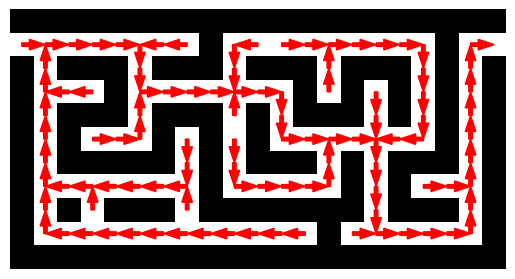

In [131]:
policy = algo.get_optimal_policy()
maze.display_policy(policy)

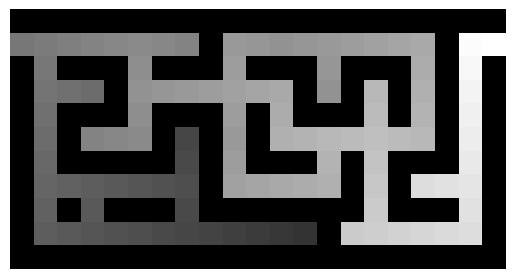

In [132]:
values = algo.values
maze.display_values(values)

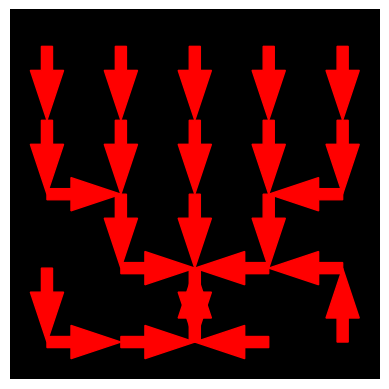

In [134]:
algo = ValueIteration(walk)
policy = algo.get_optimal_policy()
walk.display_policy(policy)

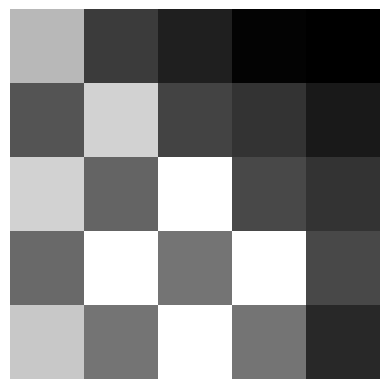

In [135]:
values = algo.values
walk.display_values(values)

In [136]:
Game = TicTacToe

In [140]:
# one-step players
game = Game(adversary_policy='one_step')
algo = PolicyEvaluation(game, policy='random')
algo.evaluate_policy()

Expected gain:

In [142]:
np.mean(algo.values)

np.float64(-0.21046283570335636)

Observe the improvement when I play perfectly against the same adversary

In [145]:
# one-step players
game = Game(adversary_policy='one_step')
algo = ValueIteration(game)
policy = algo.get_optimal_policy()
algo = PolicyEvaluation(game, policy=policy)
algo.evaluate_policy()

Expected gain:

In [146]:
np.mean(algo.values)

np.float64(0.22869800509337862)

In [147]:
Game = Nim

In [148]:
# one-step players
game = Game(adversary_policy='one_step')
algo = PolicyEvaluation(game, policy='random')
algo.evaluate_policy()

In [149]:
np.mean(algo.values)

np.float64(0.0)

In [150]:
game = Game(adversary_policy='one_step')
algo = ValueIteration(game)
policy = algo.get_optimal_policy()
algo = PolicyEvaluation(game, policy=policy)
algo.evaluate_policy()

In [151]:
np.mean(algo.values)

np.float64(0.8895343129344252)

## Perfect players

We now use Value Iteration to get perfect players, assuming the best response of the adversary.

## To do

Check the code of the new class ``ValueIteration`` below.
* Complete the method ``get_perfect_players``.
* Test it on TicTacToe. Who wins?
* Test it on Nim. Who wins?
* Is this approach applicable to ConnectFour? Why?

In [244]:
from scipy import sparse

In [245]:
class ValueIteration(PolicyEvaluation):
    """Value iteration. 
    
    Parameters
    ----------
    model: object of class Environment
        The model.
    player: int
        Player for games (1 or -1, default = default player of the game).        
    gamma: float
        Discount factor (between 0 and 1).
    n_iter: int
        Maximum number of value iterations.
    """
    
    def __init__(self, model, player=None, gamma=1, n_iter=100):
        agent = Agent(model, player=player)
        policy = agent.policy
        player = agent.player
        super(ValueIteration, self).__init__(model, policy, player, gamma)  
        self.n_iter = n_iter
    
    def get_perfect_players(self):
        """Get perfect players for games, with the best response of the adversary."""
        if not self.model.is_game():
            raise ValueError("This method applies to games only.")
        # get transitions for each player
        actions = self.model.get_all_actions()
        transitions = {action: sparse.lil_matrix((self.n_states, self.n_states)) for action in actions}
        for i, state in enumerate(self.states):    
            actions = self.model.get_available_actions(state)
            for action in actions:
                next_state = self.model.get_next_state(state, action)
                j = self.get_state_id(next_state)
                transitions[action][i, j] = 1
        transitions = {action: sparse.csr_matrix(transition) for action, transition in transitions.items()}
        self.transitions = transitions
        # Bellman's optimality equation
        values = np.zeros(self.n_states)
        # Value iteration
        for t in range(self.n_iter):
            next_values = self.rewards + self.gamma * values
            action_value = {action: transition.dot(next_values) for action, transition in self.transitions.items()}
            new_values = np.zeros(self.n_states)

            for i, state in enumerate(self.states):
                if not self.model.is_terminal(state):
                    actions = self.get_actions(state)
                    # Update values with the maximum action value
                    new_values[i] = max(action_value[action][i] for action in actions)
                else:
                    new_values[i] = self.rewards[i]

            values = new_values

        self.values = values

        # policies
        policy = self.get_policy(self.player)
        adversary_policy = self.get_policy(-self.player)
        return policy, adversary_policy
        

In [246]:
Game = TicTacToe

In [247]:
game = Game()

In [248]:
algo = ValueIteration(game)

In [249]:
policy, adversary_policy = algo.get_perfect_players()

In [250]:
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy=policy)


In [251]:
stop, states, rewards = agent.get_episode()

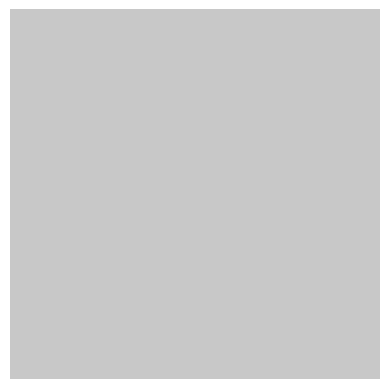

In [252]:
animation = game.display(states)

In [253]:
animation

In [254]:
rewards

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

draw in the game

In [255]:
Game = Nim

In [256]:
game = Game()

In [257]:
algo = ValueIteration(game)

In [258]:
policy, adversary_policy = algo.get_perfect_players()

In [259]:
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy=policy)

In [260]:
stop, states, rewards = agent.get_episode()

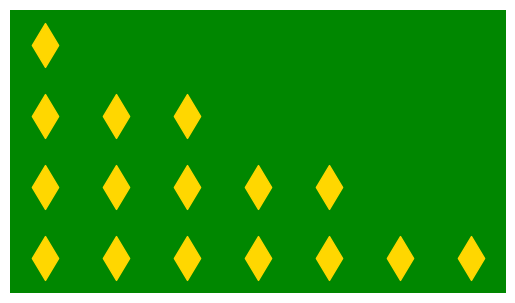

In [ ]:
animation = game.display(states)

In [262]:
animation

In [263]:
rewards

[0, 0, 0, 0, 0, 0, 0, -1]

the opponent won

Value iteration can still be applied to ConnectFour, but the larger state space makes it computationally more challenging. While it is theoretically possible, the approach would need to handle a more complex set of states, and the time complexity could become prohibitive for real-time decision-making due to the sheer number of possible board configurations.